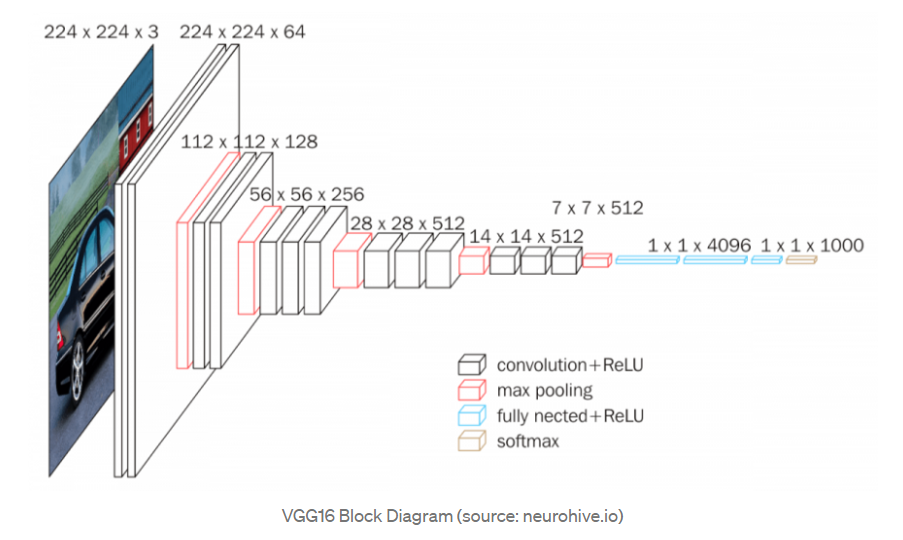

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
# example of loading the MobileNet model
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(input_shape=(32, 32, 3),weights=None, include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
len(model.layers)

19

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
# add new classifier layers for cifar10 classification
flat = Flatten()(model.layers[-1].output)
class1 = Dense(256, activation='relu')(flat)
class2 = Dense(128, activation='relu')(class1)

prediction = Dense(10, activation='softmax')(class2)

model = Model(inputs=model.inputs, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

In [ ]:
model.fit(
    x=x_train,
    y=y_train,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test),
    batch_size=128
)

Epoch 1/20
391/391 [==============================] - 70s 62ms/step - loss: 2.4827 - accuracy: 0.1016 - val_loss: 2.2999 - val_accuracy: 0.1510
Epoch 2/20
391/391 [==============================] - 22s 57ms/step - loss: 2.3097 - accuracy: 0.1025 - val_loss: 2.2981 - val_accuracy: 0.1006
Epoch 3/20
391/391 [==============================] - 22s 57ms/step - loss: 2.3110 - accuracy: 0.1038 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
391/391 [==============================] - 22s 56ms/step - loss: 2.3037 - accuracy: 0.1004 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 5/20
391/391 [==============================] - 22s 56ms/step - loss: 2.3028 - accuracy: 0.1040 - val_loss: 2.3016 - val_accuracy: 0.1114
Epoch 6/20
391/391 [==============================] - 22s 57ms/step - loss: 2.2978 - accuracy: 0.1121 - val_loss: 2.1956 - val_accuracy: 0.1539
Epoch 7/20
391/391 [==============================] - 22s 57ms/step - loss: 2.0297 - accuracy: 0.1968 - val_loss: 1.7090 - val_accuracy:

In [ ]:
exits = [3, 6, 10, 14]

In [ ]:
i = 1
for exit in exits:
  print(exit)
  exit_layer = model.layers[exit]
  Model(inputs = model.inputs, outputs = exit_layer.output).save_weights(f"/VGG16/Main_till_exit{i}_weights.h5")
  i += 1

3
6
10
14


In [ ]:
import time

In [ ]:
start = time.time()
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=100,
    verbose=1,
    validation_data=(x_test, y_test),
    batch_size=128
)
end = time.time()

Epoch 1/100
391/391 [==============================] - 31s 36ms/step - loss: 2.1843 - accuracy: 0.1516 - val_loss: 1.7894 - val_accuracy: 0.2671
Epoch 2/100
391/391 [==============================] - 13s 34ms/step - loss: 1.6434 - accuracy: 0.3382 - val_loss: 1.5220 - val_accuracy: 0.4095
Epoch 3/100
391/391 [==============================] - 13s 34ms/step - loss: 1.3491 - accuracy: 0.4914 - val_loss: 1.2909 - val_accuracy: 0.5397
Epoch 4/100
391/391 [==============================] - 13s 34ms/step - loss: 1.0841 - accuracy: 0.6099 - val_loss: 1.0178 - val_accuracy: 0.6385
Epoch 5/100
391/391 [==============================] - 13s 33ms/step - loss: 0.9259 - accuracy: 0.6704 - val_loss: 0.9751 - val_accuracy: 0.6608
Epoch 6/100
391/391 [==============================] - 13s 33ms/step - loss: 0.7998 - accuracy: 0.7222 - val_loss: 0.9044 - val_accuracy: 0.6919
Epoch 7/100
391/391 [==============================] - 13s 33ms/step - loss: 0.6998 - accuracy: 0.7623 - val_loss: 0.8968 - val_ac

In [ ]:
epochs = [20, 30, 40, 50, 60, 70, 80, 90, 100]
acc_epoch = []
for epoch in epochs:
  acc_epoch.append(history.history.get('val_accuracy')[epoch-1])

acc_epoch


[0.762499988079071,
 0.7767999768257141,
 0.774399995803833,
 0.7839000225067139,
 0.7815999984741211,
 0.7782999873161316,
 0.7861999869346619,
 0.7717999815940857,
 0.7864999771118164]

In [ ]:
end-start

1337.696055173874